In [70]:
import sys
import os
import importlib # Used during testing if I need to reload modules

import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.stats
import scipy.signal
import pandas as pd

In [71]:
try:
    import ngif_romar.tools as tools
    import ngif_romar.plots.make_plots as plots
    import ngif_romar.plots.plots_tools as plots_tools
except ModuleNotFoundError as error:
    # If not in path/installed, use relative import
    module_path = os.path.abspath(os.path.join("."))
    sys.path.append(module_path)
    import ngif_romar.tools as tools
#    import ngif_romar.plots.make_plots as plots
#    import ngif_romar.plots.plots_tools as plots_tools

In [72]:
dataset_path = os.path.join("..", "data", "SN2", "20201001_1739_")
logfile_path = os.path.join(dataset_path, "Data.dat")
meta_dict, data_df = tools.read_data(logfile_path)
data_df = tools.post_process_log_data(data_df)

In [73]:
data_df['laser_on_time(ms)']

0          0
1        100
2        200
3        300
4        400
        ... 
12764      0
12765      0
12766      0
12767      0
12768      0
Name: laser_on_time(ms), Length: 12769, dtype: int64

In [74]:
from pca import pca
import numpy as np
data_df_filtered = data_df[
    data_df["laser_on_time(ms)"]>200
]
vals = data_df_filtered[['meltpoolSize','meltpoolTemp','flowWatch','protectionGlasTemperature']].to_numpy().T # transpose to get column form
# columns are meltpoolSize, ..Temp, flowWatch, glasTemp

In [75]:
model = pca(alpha=0.5) # alpha = threshold for outliers in t2 test
out = model.fit_transform(vals)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11193] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [1] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.50] and n_components=[1]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [76]:
import matplotlib.pyplot as plt

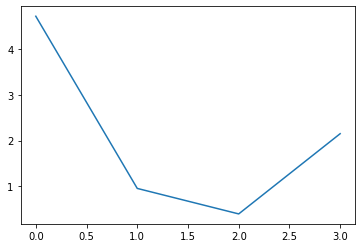

In [77]:
plt.plot(out['outliers']['y_score'].values)